In [90]:
import cv2
import os
import random
import numpy as np
import pandas as pd

In [91]:
# define dir
data_dir = "../../crop_part1"
fnames_subset = os.listdir(data_dir)

In [92]:
fnames_subset

['9_1_2_20161219204347420.jpg.chip.jpg',
 '1_1_2_20161219154612988.jpg.chip.jpg',
 '16_0_0_20170104003740977.jpg.chip.jpg',
 '1_1_3_20161219230734016.jpg.chip.jpg',
 '26_1_1_20170103181931657.jpg.chip.jpg',
 '2_0_2_20161219141650121.jpg.chip.jpg',
 '53_1_0_20170110143534851.jpg.chip.jpg',
 '36_1_4_20170104172843788.jpg.chip.jpg',
 '37_0_0_20170104205628245.jpg.chip.jpg',
 '10_0_1_20170110223848885.jpg.chip.jpg',
 '1_0_2_20161219205313061.jpg.chip.jpg',
 '52_0_0_20170104212337021.jpg.chip.jpg',
 '18_1_0_20170109212830216.jpg.chip.jpg',
 '34_1_3_20170104235537715.jpg.chip.jpg',
 '34_1_4_20170103230336761.jpg.chip.jpg',
 '34_1_0_20170104174537956.jpg.chip.jpg',
 '30_0_0_20170104000150443.jpg.chip.jpg',
 '75_1_3_20170110175327928.jpg.chip.jpg',
 '24_1_2_20170104020224692.jpg.chip.jpg',
 '86_1_0_20170110180113129.jpg.chip.jpg',
 '3_0_3_20161219225157056.jpg.chip.jpg',
 '54_1_0_20170110141340224.jpg.chip.jpg',
 '60_1_0_20170110141610416.jpg.chip.jpg',
 '1_0_2_20161219211357821.jpg.chip.jpg',

In [93]:
# remove two files from the data set that do not follow the naming convention, therefore have not been labelled correctly and can't be used
del fnames_subset[8903]
del fnames_subset[6680]

## Pre-Processing

In [94]:
# X: flattened version
# X_origin_dict: original version; key: index, value: 3-D np array
X_rgb = list()
X_origin_dict = dict()
for i, fname in enumerate(fnames_subset):
    # construct dir
    dir = data_dir + "/" + fname
    
    # read the data
    dat = cv2.imread(dir)

    dat = cv2.cvtColor(dat, cv2.COLOR_BGR2RGB)
    
    # store the original data
    X_origin_dict[i] = dat
    
    # store the data
    X_rgb.append(dat)

# convert to np array
#X_rgb1 = np.array(X_rgb)
#print("The shape of the X_rgb is:", X_rgb1.shape)

Combine data into a data frame

In [25]:
df = pd.DataFrame(columns=["image", "age", "race", "gender"])
age = []
race = []
gender =[]
for fname in fnames_subset:
    temp = fname.split("_")
    age.append(temp[0])
    race.append(temp[2])
    gender.append(temp[1])
    pass

In [27]:
# combine indian and asian labels into one "asian" label
race = ['2' if i=='3' else i for i in race]
# relabel "other" to 3
race = ['3' if i=='4' else i for i in race]

In [28]:
# assign lists into the dataframe
df.image = X_rgb
df.age = [int(i) for i in age]
df.race = [int(i) for i in race]
df.gender = [int(i) for i in gender]

In [29]:
df

,image,age,race,gender
0,"[[[93, 107, 74], [90, 104, 71], [87, 101, 68],...",9,2,1
1,"[[[97, 63, 51], [95, 61, 49], [91, 57, 45], [8...",1,2,1
2,"[[[13, 5, 2], [16, 8, 5], [17, 9, 6], [16, 8, ...",16,0,0
3,"[[[84, 55, 37], [85, 56, 38], [89, 58, 40], [9...",1,2,1
4,"[[[25, 24, 20], [22, 21, 17], [20, 19, 15], [2...",26,1,1
...,...,...,...,...
9773,"[[[60, 47, 39], [60, 47, 39], [61, 48, 40], [6...",16,0,1
9774,"[[[6, 8, 3], [6, 8, 3], [6, 8, 3], [5, 7, 2], ...",1,2,1
9775,"[[[113, 102, 84], [107, 96, 78], [98, 87, 69],...",71,0,0
9776,"[[[112, 103, 98], [113, 104, 97], [113, 100, 9...",54,0,0


In [36]:
df.shape

(9778, 4)

In [98]:
#Write data to csv for later usage
data_dir2 = "~/Documents/MIDS_Spring_semester/IDS705_Machinelearning/Final_team_project/team8_ML/20_data"
df.to_csv(f"{data_dir2}/image_data.csv")

### LOOKING AT DISTRIBUTIONS OF AGE, RACE AND GENDER 
#### This will help us understand the imbalance in the data

Labels

[age] is an integer from 0 to 116, indicating the age

[gender] is either 0 (male) or 1 (female)

[race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern)

#### create a new dataset with labelled data

In [41]:
df1 = df.copy()

In [42]:
df1.head()

,image,age,race,gender
0,"[[[93, 107, 74], [90, 104, 71], [87, 101, 68],...",9,2,1
1,"[[[97, 63, 51], [95, 61, 49], [91, 57, 45], [8...",1,2,1
2,"[[[13, 5, 2], [16, 8, 5], [17, 9, 6], [16, 8, ...",16,0,0
3,"[[[84, 55, 37], [85, 56, 38], [89, 58, 40], [9...",1,2,1
4,"[[[25, 24, 20], [22, 21, 17], [20, 19, 15], [2...",26,1,1


#### Race

In [54]:
#Writing a function that creates dummy variable for eacg race
def races(x):
        if x == 0 : return "white"
        if x == 1 : return "black"
        if x == 2 : return "asian"
        if x == 3 : return "others"

df1['race1'] = df1['race'].apply(races)

In [55]:
df1["race1"].value_counts()

white     5265
asian     3005
others    1103
black      405
Name: race1, dtype: int64

#### Gender

In [56]:
#Writing a function that creates dummy variable for each gender
def genda(x):
        if x == 0 : return "male"
        if x == 1 : return "female"
df1['gender1'] = df1['gender'].apply(genda)

In [57]:
df1["gender1"].value_counts()

female    5406
male      4372
Name: gender1, dtype: int64

#### Age

In [61]:
#categorising age into age groups
df1.loc[(df1.age < 13),  'AgeGroup'] = 'Kid'
df1.loc[(df1.age >= 13) & (df1.age < 26 ),  'AgeGroup'] = 'Adolescents'
df1.loc[(df1.age >= 26) & (df1.age < 46 ),  'AgeGroup'] = 'Adults'
df1.loc[(df1.age >= 46),  'AgeGroup'] = 'mature'

In [62]:
df1["AgeGroup"].value_counts()

Kid            3255
mature         2682
Adults         2115
Adolescents    1726
Name: AgeGroup, dtype: int64

### Visualising the classes for the different variables above

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Racial Groupings

Text(0, 0.5, 'Number of images')

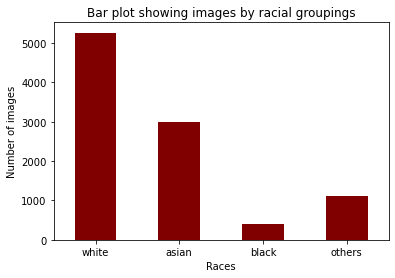

In [89]:
# Create a sample dataframe with an text index
race_d = pd.DataFrame(
    {"race1": [5265, 3005, 405, 1103]}, 
    index=["white", "asian", "black", "others"])
# Plot a bar chart
#race_d.plot(kind="bar")
from matplotlib import pyplot as plt
race_d['race1'].plot(kind="bar", title="Bar plot showing racial groupings", color ='maroon')
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Bar plot showing images by racial groupings")
plt.xlabel("Races")
plt.ylabel("Number of images")

#### Gender

Text(0, 0.5, 'Number of images')

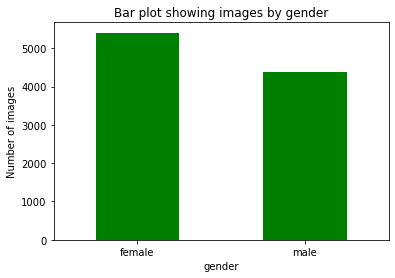

In [86]:
# Create a sample dataframe with an text index
gender_d = pd.DataFrame(
    {"gender1": [5406, 4372]}, 
    index=["female", "male"])
# Plot a bar chart
#race_d.plot(kind="bar")
#from matplotlib import pyplot as plt
gender_d['gender1'].plot(kind="bar", title="Bar plot showing gender", color ='green')
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Bar plot showing images by gender")
plt.xlabel("gender")
plt.ylabel("Number of images")

#### Age groups

Text(0, 0.5, 'Number of images')

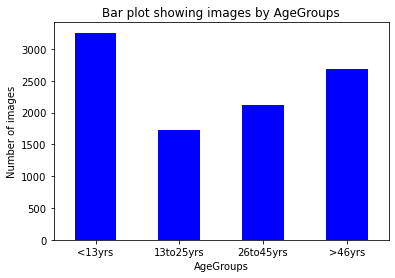

In [88]:
# Create a sample dataframe with an text index
age_d = pd.DataFrame(
    {"AgeGroup": [3255, 1726, 2115, 2682]}, 
    index=["<13yrs", "13to25yrs","26to45yrs", ">46yrs"])
# Plot a bar chart
#race_d.plot(kind="bar")
#from matplotlib import pyplot as plt
age_d['AgeGroup'].plot(kind="bar", title="Bar plot showing AgeGroups", color ='blue')
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Bar plot showing images by AgeGroups")
plt.xlabel("AgeGroups")
plt.ylabel("Number of images")